In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df = pd.read_csv("data/kv_listings_with_accessibility_and_noise.csv")
print(df.head())

   Index                                            Address  Room Count  \
0      1  Tartu, Tartu linn, Raadi-Kruusamäe, Kaupmehe t...           3   
1      2                         Tartu, Ülejõe, Staadioni 3           4   
2      3  Tartu, Tartu linn, Raadi-Kruusamäe, Kaupmehe t...           2   
3      4                             Tartu, Ülejõe, Pikk 76           2   
4      5  Tartu, Tartu linn, Raadi-Kruusamäe, Kaupmehe t...           4   

      Size      Price  Teenus_arv Teenustase  Tookoht_protsent  Kool_arv  \
0  64.3 m²  175 900 €         0.0          0          0.000000       0.0   
1    75 m²  235 000 €        37.0   Hea tase         58.684642       2.0   
2  50.8 m²  160 900 €         0.0          0          0.000000       0.0   
3  38.3 m²   89 000 €        33.0   Hea tase         58.533192       2.0   
4    83 m²  209 900 €         4.0          -          6.270224       0.0   

   Lasteaed_arv  Toidupood_arv  Toidukoht_arv  Parkimisnorm  \
0           0.0            0.

In [39]:
df = df.drop(columns=["Index", "Address"])

df["Teenustase"] = df["Teenustase"].replace("-", 0).replace("Baastase", 1).replace("Hea tase", 2)

df["Price"] = df["Price"].str.replace("€", "").str.replace(",", "").str.replace(" ","").astype(float)
df["Size"] = df["Size"].str.replace("m²", "").astype(float)
df["Room Count"] = df["Room Count"].astype(float)

# Calculate price per square meter
df["Price per m2"] = df["Price"] / df["Size"]

Toidukoht_arv          0.321108
Teenus_arv             0.286189
Tookoht_protsent       0.152158
Noise                  0.116207
Toidupood_arv          0.057763
Teenustase             0.053346
Latitude               0.005275
Distance              -0.054602
Lasteaed_arv          -0.117847
Parkimis_koefitsent   -0.122029
Parkimisnorm          -0.122269
Size                  -0.164823
Longitude             -0.174282
Room Count            -0.178181
Kool_arv              -0.218110
Name: Price per m2, dtype: float64


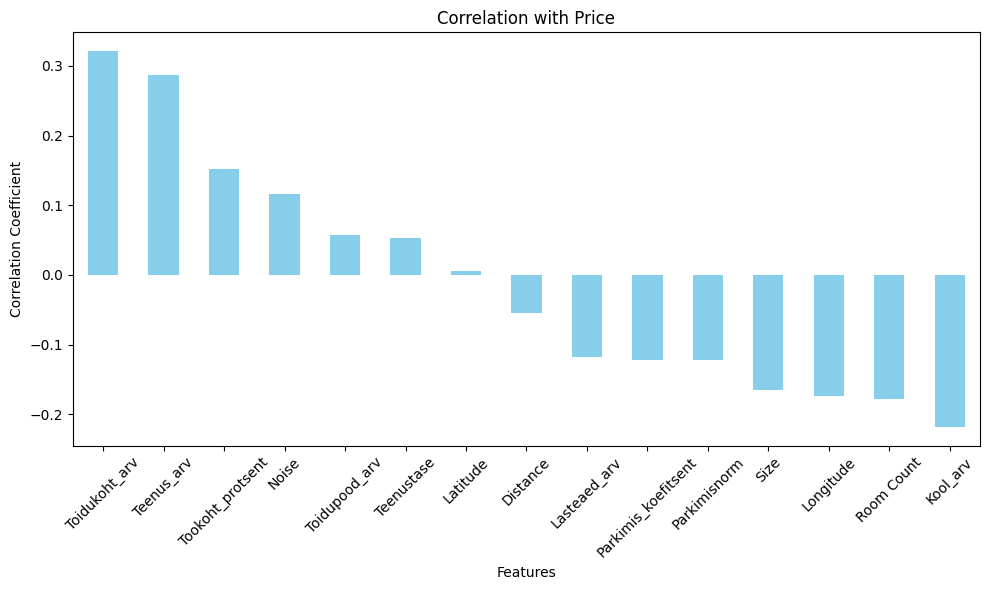

In [40]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlations with the 'Price' column
price_correlation = correlation_matrix["Price per m2"].sort_values(ascending=False)
price_correlation = price_correlation.drop(["Price per m2", "Price"])

# Print the correlations
print(price_correlation)

# Visualize the correlations as a bar chart
plt.figure(figsize=(10, 6))
price_correlation.plot(kind='bar', color='skyblue')
plt.title("Correlation with Price")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mean Squared Error: 519668.9844615591
Parkimis_koefitsent    4098.999215
Latitude                143.855036
Room Count               21.814026
Teenus_arv               17.217446
Noise                    11.495373
Toidupood_arv            10.997820
Tookoht_protsent          8.795106
Toidukoht_arv             1.084849
Distance                  0.003675
Size                     -8.007216
Lasteaed_arv            -37.402073
Parkimisnorm            -41.963133
Longitude              -122.183302
Kool_arv               -242.696751
Teenustase             -364.672117
dtype: float64


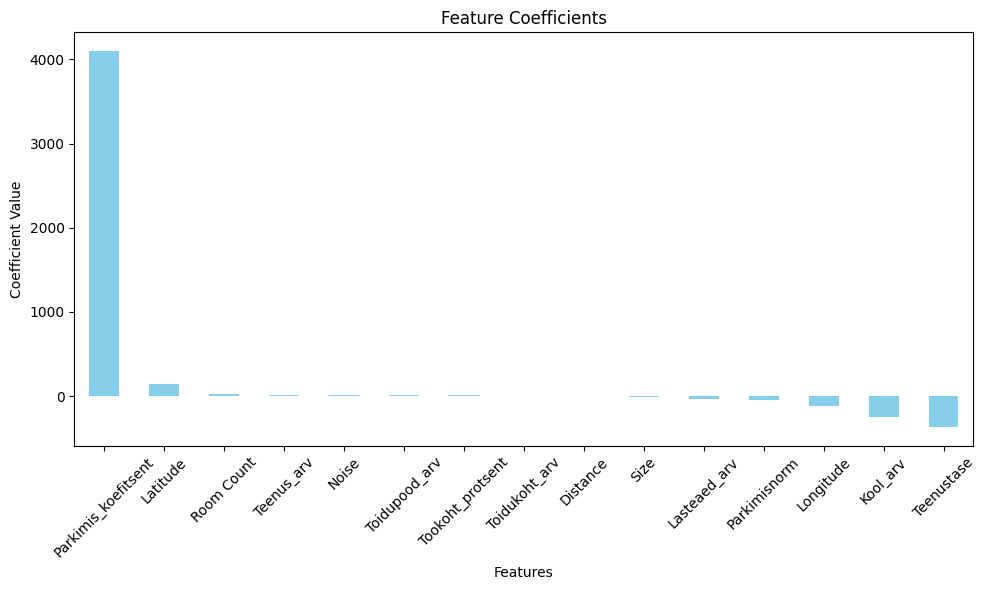

In [41]:
# Create model for predicting price per square meter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the features and target variable
X = df.drop(columns=["Price per m2", "Price"])
y = df["Price per m2"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the coefficients
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

# Print the coefficients
print(coefficients)

# Visualize the coefficients as a bar chart
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar', color='skyblue')
plt.title("Feature Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_15786/853969665.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(False, 0).replace(True, 1)


Mean Squared Error: 279296.99968075054
Distance               0.178274
Size                   0.149154
Longitude              0.124268
Tookoht_protsent       0.110774
Latitude               0.101805
Teenus_arv             0.067048
Toidukoht_arv          0.054924
Lasteaed_arv           0.043884
Parkimis_koefitsent    0.042190
Toidupood_arv          0.034061
Noise                  0.027713
Parkimisnorm           0.023502
Room Count             0.020402
Kool_arv               0.012287
Teenustase_1           0.007459
Teenustase_0           0.000880
Teenustase_0           0.000761
Teenustase_2           0.000616
dtype: float64


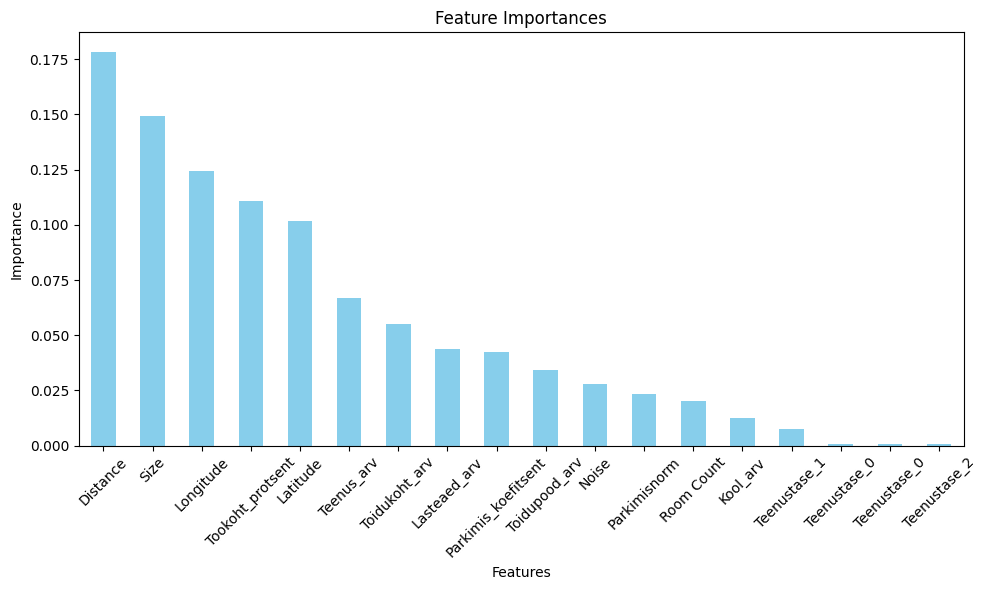

In [42]:
# Create a random forest classifier for predicting the price per square meter
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the features and target variable
X = df.drop(columns=["Price per m2", "Price"])

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Convert all false values to 0 and true values to 1
X = X.replace(False, 0).replace(True, 1)

y = df["Price per m2"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Create a random forest regressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Calculate the feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print the feature importances
print(importances)

# Visualize the feature importances as a bar chart
plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mean Squared Error: 386576.9093896656
Distance               0.166155
Latitude               0.152482
Size                   0.151406
Teenus_arv             0.117232
Tookoht_protsent       0.110925
Lasteaed_arv           0.090260
Toidukoht_arv          0.062200
Longitude              0.048592
Parkimis_koefitsent    0.029479
Noise                  0.028499
Room Count             0.024595
Toidupood_arv          0.005115
Teenustase_0           0.004622
Parkimisnorm           0.004102
Kool_arv               0.002414
Teenustase_0           0.001447
Teenustase_1           0.000268
Teenustase_2           0.000208
dtype: float64


/tmp/ipykernel_15786/1086560253.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(False, 0).replace(True, 1)


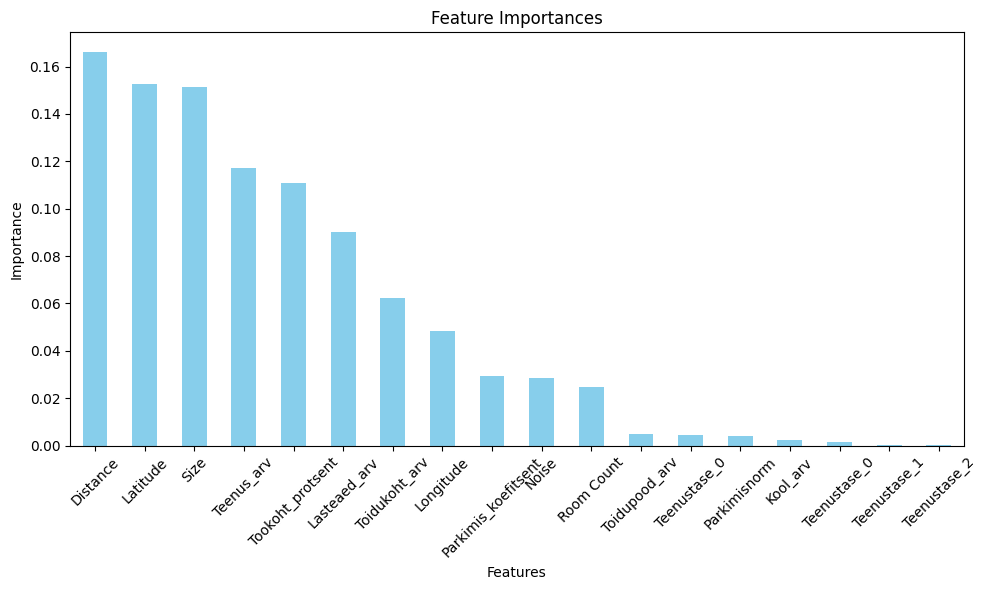

In [43]:
# Create decision tree model for predicting the price per square meter
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the features and target variable
X = df.drop(columns=["Price per m2", "Price"])

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Convert all false values to 0 and true values to 1
X = X.replace(False, 0).replace(True, 1)

y = df["Price per m2"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Create a decision tree regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Calculate the feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print the feature importances
print(importances)

# Visualize the feature importances as a bar chart
plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

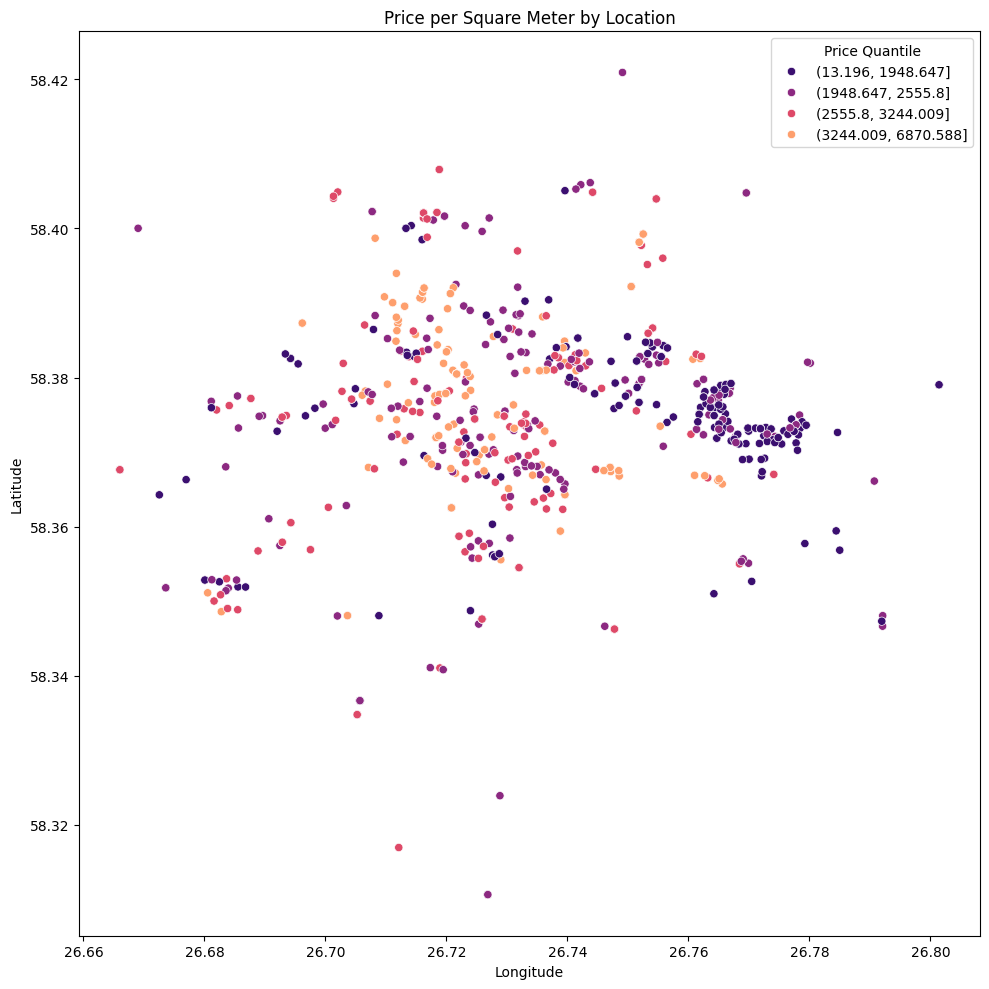

In [44]:
# Remove outliers of latitude and longitude
df = df[(df["Latitude"] > 58.2) & (df["Latitude"] < 58.44)]
df = df[(df["Longitude"] > 26.65) & (df["Longitude"] < 226.9)]

df['Price Quantile'] = pd.qcut(df['Price per m2'], q=4)

# Create heatmap of longitude and latitude and price per square meter
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Price Quantile', palette='magma', legend='full')
plt.title("Price per Square Meter by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()